<a href="https://colab.research.google.com/github/riman01x/software-engineering-/blob/main/ipLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up the enviroment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#blank 300×300 RGB image
image = np.zeros((300, 300, 3), dtype=np.float32)

# red square
image[50:150, 50:150] = [255, 0, 0]

# blue rectangle
image[180:250, 100:250] = [0, 0, 255]

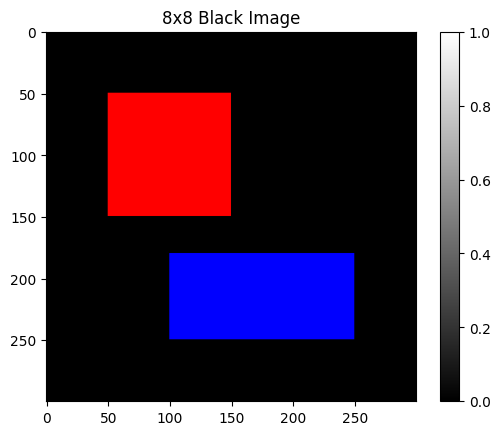

In [ ]:
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()

add noise

[[[ 0 12  0]
  [ 5  0  0]
  [12  0 13]
  ...
  [ 0  0 15]
  [ 0 16  6]
  [23  0  9]]

 [[ 0 59  9]
  [ 0  0  0]
  [ 0 53  0]
  ...
  [ 0  0  0]
  [ 5 19  0]
  [ 0  4  0]]

 [[43 19  0]
  [ 0  5  0]
  [ 0  0  0]
  ...
  [ 0 19 26]
  [ 0 23  0]
  [ 0  0  0]]

 ...

 [[ 0  0  1]
  [ 0  0 14]
  [ 0 51  0]
  ...
  [ 0 10  0]
  [18  0  0]
  [42  0  0]]

 [[17  5 33]
  [ 0  0  1]
  [10  0  0]
  ...
  [ 0  0 32]
  [18  0  0]
  [ 9  0 12]]

 [[79  0 24]
  [ 0  8  0]
  [ 0  0  0]
  ...
  [30  0  7]
  [14  0 10]
  [16  0  0]]]


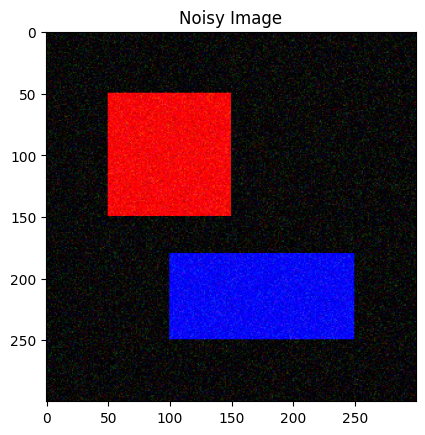

In [ ]:
# adding noise
noise = np.random.normal(0, 25, image.shape)

# add noise and clip to valid range
noisy = np.clip(image + noise ,0, 255).astype(np.uint8)
print(noisy)

plt.imshow(noisy)
plt.title("Noisy Image")
plt.show()

contrast streatching                                                          

In [ ]:
enhanced = (noisy - noisy.min()) / (noisy.max() - noisy.min())

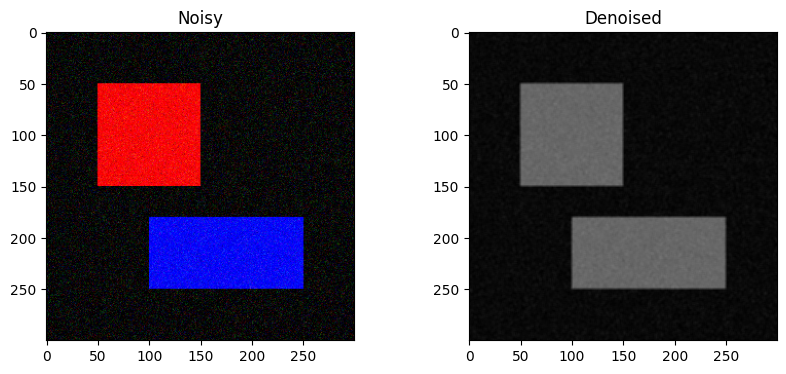

In [ ]:
def mean_filter(img, k=3):# goes throught 3x3 pixels
    pad = k // 2
    padded = np.pad(img, pad, mode='edge') # fill the sides
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised = mean_filter(noisy)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()

In [ ]:
print(denoised.min(), denoised.max()) # to know the range for the segmentation

0 115


In [ ]:
threshold = 7
segmente = denoised > threshold

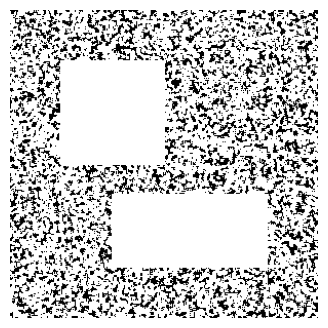

In [ ]:
segmented_display = (segmente.astype(np.uint8) * 255)

plt.figure(figsize=(4,4))
plt.imshow(segmented_display, cmap='gray')
plt.axis("off")
plt.show()